Epoch 1/5
469/469 [==============================] - 10s 20ms/step - loss: 0.2344 - accuracy: 0.9347
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0754 - accuracy: 0.9781
Epoch 3/5
469/469 [==============================] - 10s 20ms/step - loss: 0.0534 - accuracy: 0.9842
Epoch 4/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0415 - accuracy: 0.9877
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9833
La función de perdida es:  0.05018847435712814
La precision es:  0.983299970626831
1/1 [==============================] - 0s 206ms/step
La imagen se clasifica como: 9


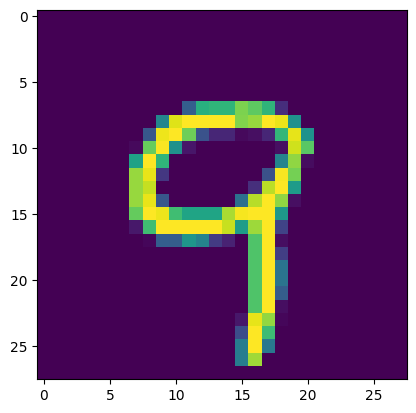

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#Cargar datos de entranamiento y pruebas (imagenes de números)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#ver imagen
plt.imshow(x_train[1000])

#concer tamaño y numero de imagenes
x_train.shape

#Preparar datos
#Estandarizar los valores entre 0 y 1 de pixeles (0 255)
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

#Cambiar forma de los datos (-1: establece la dimension, tamño pixeles, b/n(1) o color(3))
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

#Crear Arquitectura de la red neuronal convolucional
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#capa convolucion(#filtros, kernel,fun actvación, forma entrada)
capa_convolucion=Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))
#Capa de agrupamiento, cada región de 2x2 píxeles en la entrada se reduce a un solo píxe
capa_agrupamiento=MaxPooling2D(pool_size=(2,2))
#Cpa de aplanamiento
capa_aplanamiento=Flatten()
#Caps Densas ocultas (numero de nuronas)
capa_oculta= Dense(units=64,activation="relu")
#capa salida
capa_salida=Dense(units=10,activation="softmax")

modelo=keras.Sequential([capa_convolucion,capa_agrupamiento,capa_aplanamiento, capa_oculta, capa_salida])

#Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy',metrics=["accuracy"])

#pasar a categoricas (10 salidas)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

#Entrenar el modelo
modelo.fit(x_train,y_train,batch_size=128, epochs=5)

#Evaluar modelo con los datos de prueba
func_perdida=modelo.evaluate(x_test,y_test)
print("La función de perdida es: ",func_perdida[0])
print("La precision es: ",func_perdida[1])

#leer imagen
imagen=x_test[105]
plt.imshow(imagen)

import numpy as np
#Agregar una dimensión adicional para representar el canal de color(escala de grises) se grega al final
imagen=np.expand_dims(imagen, axis=-1)

#Agregar una dimensión adicional para representar el lote de imagenes
imagen=np.expand_dims(imagen, axis=0)

#Realizar prediccion
prediccion= modelo.predict(imagen)
prediccion_categoria= np.argmax(prediccion[0])

#Imprimir prediccion
print('La imagen se clasifica como:',prediccion_categoria)